<a href="https://colab.research.google.com/github/itz-kap304/Jovian_Data_Analytics/blob/main/L11_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression
We use correlation in statistical terms to denote the association between two quantitative variables. 
When it comes to quantitative variables and correlation, we also assume that the relationship is linear, that is, one variable increases or decreases by a fixed amount when there is an increase or decrease in another variable. To determine a similar relationship, there is the other method that's often used in these situations, **regression**, which includes determining the best straight line for the relationship. A simple equation, called the regression equation, can represent the relation:

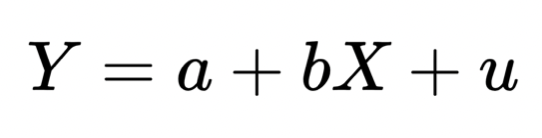


Let's examine this formula:
* Y = The dependent variable (the variable that you are trying to predict). It is often
referred to as the outcome variable.
* X = The independent variable (the variable that you are using to predict Y). It is
often referred to as the predictor, or the covariate or feature.
* a = The intercept
* b = The slope
* u = The regression residual

If y represents the dependent variable and x represents the independent variable, this relationship is described as the regression of y on x. The relationship between x and y is generally represented by an equation. The equation shows how much y changes with respect to x.
There are several reasons why people use regression analysis. The most obvious reasons are as follows:

* We can use regression analysis to predict future economic conditions, trends, or values.
* We can use regression analysis to determine the relationship between two or more variables.
* We can use regression analysis to understand how one variable changes when another also change.


In a later section, we will use the regression function for model development to predict the dependent variable while implementing a new explanatory variable in our function. Basically, we will build a prediction model. So, let's dive further into the regression.

##Types of regression
The two main regression types are linear regression and multiple linear regression. Most simple data can be represented by linear regression. Some complex data follows multiple linear regression. We will examine the types of regression with Python in this chapter. Finally, we will end the discussion with different aspects of a nonlinear example.

###Simple linear regression

Linear regression, which is also called simple linear regression, defines the relationship between two variables using a straight line. During linear regression, our aim is to draw a line closest to the data by finding the slope and intercept that define the line. The equation for simple linear regression is generally given as follows:

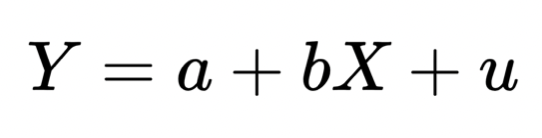

X is a single feature, Y is a target, and a and b are the intercept and slope respectively. The question is, how do we choose a and b? The answer is to choose the line that minimizes the error function, u. This error function is also known as loss or cost function, which is the sum of the square (to ignore the positive and negative cancelation) of the difference of the vertical distance between the line and the data point.


This calculation is called the Ordinary Least Squares (OLS). Note that explaining every aspect of regression is beyond the scope of this book, and we suggest you explore the Further reading section to broaden your knowledge about the subject.

###Multiple linear regression
In the case of multiple linear regression, two more independent variables or explanatory variables show a linear relationship with the target or dependent variables. Most of the linearly describable phenomena in nature are captured by multiple linear regression. For example, the price of any item depends on the quantity being purchased, the time of the year, and the number of items available in the inventory. For instance, the price of a bottle of wine depends primarily on how many bottles you bought. Also, the price is a bit higher during festivals such as Christmas. Moreover, if there are a limited number of bottles in the inventory, the price is likely to go even higher. In this case, the price of wine is dependent on three variables: quantity, time of year, and stock quantity. This type of relationship can be captured using multiple linear regression.


The equation for multiple linear regression is generally given as follows:

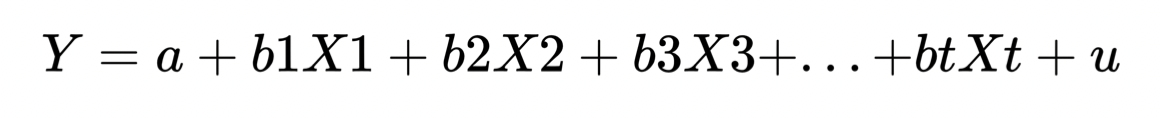

Here, Y is the dependent variable and Xs is the independent variable.

###Nonlinear regression
Nonlinear regression is a type of regression analysis in which data follows a model and is then represented as a function of mathematics. Simple linear regression relates to two variables (X and Y) with a straight line function,   , whereas nonlinear regression has to generate a curve. Nonlinear regression uses a regression equation, which is as follows:

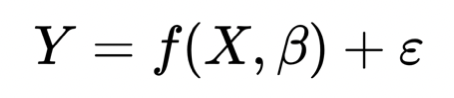

Let's look at this formula:
* X = A vector of p predictors
* β = A vector of k parameters
* f(-) = A known regression function 
* ε = An error term

Nonlinear regression can fit an enormous variety of curves. It uses logarithmic functions, trigonometric functions, exponential functions, and many other fitting methods. This modeling is similar to linear regression modeling because both attempt to graphically control a specific answer from a set of variables. These are more complicated to develop than linear models because the function is generated by means of a series of approximations (iterations) that may result from trial and error. Mathematicians use a variety of established methods, such as the Gauss-Newton and Levenberg-Marquardt methods. The goal of this nonlinear model generated curve line is to make the OLS as small as possible. The smaller the OLS the better the function fits in the dataset's points. It measures how many observations vary from the dataset average.


## Model development and evaluation
Till now we discussed different types of regression theoretically. Now we are going to use the scikit-learn library to implement linear regression and evaluate the model. To do this we will use the Boston housing pricing dataset. We will discuss different model evaluation techniques used in the case of regression.

Constructing a linear regression model
The first concept that comes to mind of any data science professional when solving any regression problem is to construct a linear regression model. Linear regression is one of the oldest algorithms, but it's still very efficient. 

We will build a linear regression model in Python using a sample dataset. This dataset is available in scikit-learn as a sample dataset called the Boston housing prices dataset. We will use the sklearn library to load the dataset and build the actual model.

In [ ]:
#Importing all the necessary libraries and creating dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150
# loading the data
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%209/Boston.csv")

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [ ]:
# Following code will return all keys and values as dictionary
print(df.keys())

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
# print the columns present in the dataset
print(df.columns)
# print the top 5 rows in the dataset
print(df.head())

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')
      CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


The column MEDV is the target variable and, it will be used as the target variable while building the model. The target variable (y) is separate from the feature variable (x).

In the new overall dataframe, let's check if we have any missing values:

In [ ]:
df.isna().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Particularly in the case of regression, it is important to make sure that our data does not have any missing values because regression won't work if the data has missing values.

Correlation analysis is a crucial part of building any model. We have to understand the distribution of the data and how the independent variables correlate with the dependent variable.

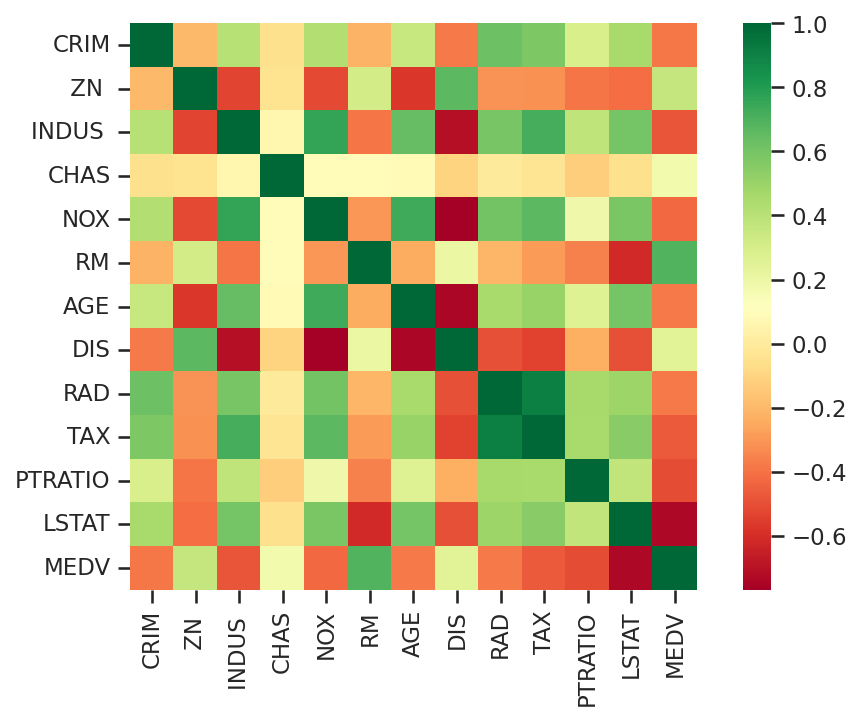

In [ ]:
#plot a heatmap describing the correlation between the columns in the dataset

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Since we want to build a linear regression model, let's look for a few independent variables that have a significant correlation with MEDV. From the preceding heatmap, RM (the average number of rooms per dwelling) has a positive correlation with MEDV (the median value of owner-occupied homes in $1,000s), so we will take RM as a feature (X) and MEDV as a predictor (y) for our linear regression model.

We can use the lmplot method from seaborn to see the relationship between RM and MEDV. Check out the following snippet:

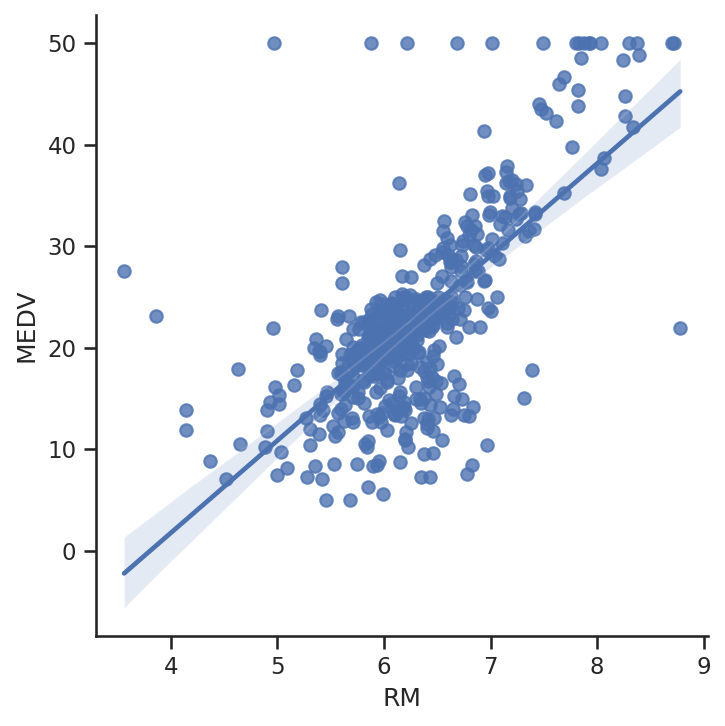

In [ ]:
sns.lmplot(x = 'RM', y = 'MEDV', data = df)

The preceding screenshot shows a strong correlation between these two variables. However, there are some outliers that we can easily spot from the graph. 

Scikit-learn needs to create features and target variables in arrays, so be careful when assigning columns to X and y:
           

In [ ]:
# Preparing the data
X = df[['RM']]
y = df[['MEDV']]

And now we need to split our data into train and test sets. Sklearn provides methods through which we can split our original dataset into train and test datasets. As we already know, the reason behind the regression model development is to get a formula for predicting output in the future. 

But how can we be sure about the accuracy of the model's prediction? 

A logical technique for measuring the model's accuracy is to divide the number of correct predictions, by the total number of observations for the test.

For this task, we must have a new dataset with already known output
predictions. The most commonly used technique for this during model
development is called the train/test split of the dataset. Here, you divide the
dataset into a training dataset and a testing dataset. We train, or fit, the model to
the training dataset and then compute the accuracy by making predictions on the
test (labeled or predicted) dataset.

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

X is our independent variable here, and Y is our target (output) variable. 

In train_test_split, test_size indicates the size of the test dataset. test_size is the proportion of our data that is used for the test dataset. 

Here, we passed a value of 0.3 for test_size, which means that our data is now divided into 70% training data and 30% test data. 
Lastly, random_state sets the seed for the
random number generator, which splits the data. 
The train_test_split() function will return four arrays: the training data, the testing data, the training
outputs, and the testing outputs.

Now the final step is training the linear regression model. From the extremely powerful sklearn library, we import the LinearRegression() function to fit
our training dataset to the model. 

When we run LinearRegression().fit(),
the function automatically calculates the OLS, which we discussed earlier, and
generates an appropriate line function:


In [ ]:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression()

Now, we have a model called regressor that is fully trained on the training dataset. 

The
next step is to evaluate how well the model predicts the target variable correctly.

##Model evaluation

Our linear regression model has now been successfully trained. Remember that we
separated some data from our dataset for testing, which we intend to use to find the
accuracy of the model. We will be using that to assess the efficiency of our model. 

R2-statistics is a common method of measuring the accuracy of regression models:

1. R2 can be determined using our test dataset in the LinearRegression.score()
method:


In [ ]:
#check prediction score/accuracy
regressor.score(X_test, y_test)


0.5383003344910231

The score(y_test, y_pred) method predicts the Y values for an input set, X,
and compares them against the true Y values. The value of R2
 is generally between
0 and 1. The closer the value of R2
 to 1, the more accurate the model is. Here, the
R2
 score is 0.53 ≈ 53% accuracy, which is okay. With more than one independent
variable, we will improve the performance of our model, which we will be
looking at next.


2. Before that, let's predict the y values with our model and evaluate it more. And a
target variables DataFrame is also built:


In [ ]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,25.153909
1,31.1,26.773693
2,23.5,22.284072
3,26.6,27.997335
4,19.6,14.484456
5,14.3,23.569336
6,50.0,32.839084
7,14.3,16.535597
8,20.7,19.026896
9,37.6,37.689635


The preceding screenshot shows the difference between the actual values and the predicted
values. We can see them if we plot them:

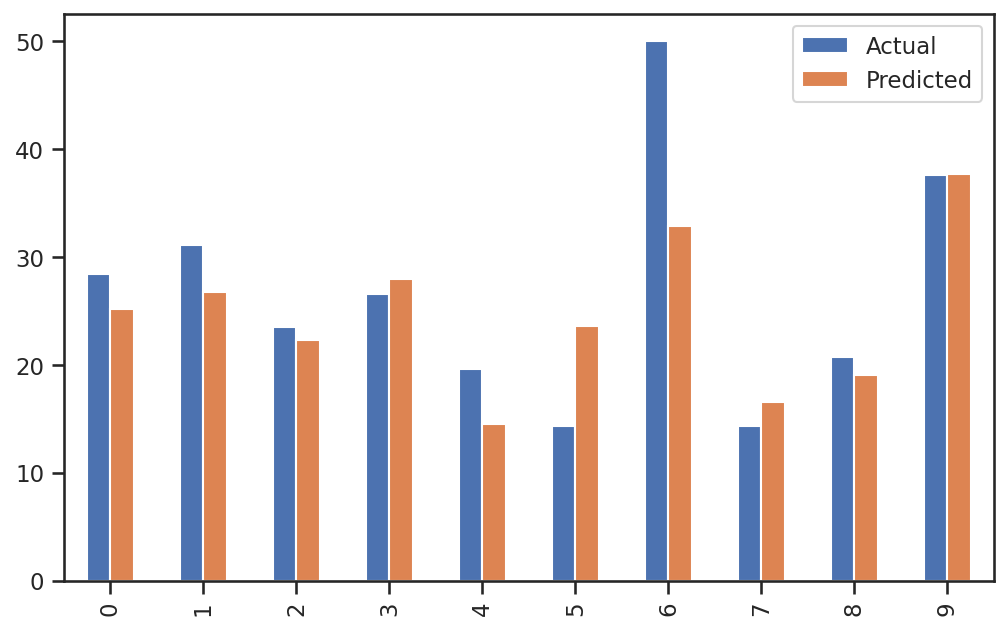

In [ ]:
evaluate.head(10).plot(kind = 'bar')


Computing accuracy

Sklearn provides metrics that help us evaluate our models with multiple formulas. The
three main metrics used to evaluate models are 

mean absolute error, mean squared error,
and R2
score.


In [ ]:
# Scoring the model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")


R2 score: 0.5383003344910231
MAE score: 4.750294229575126
MSE score: 45.07733942471831



In any machine learning scenario, we try to improve accuracy by performing several optimization
techniques. 

Understanding accuracy

We have used the scikit-learn library to train a regression model. In addition to that, we have used the trained model to predict some data, and then we computed the accuracy. For
example, in the last figure The first entry says the actual value is 28.4 but our trained
regression model predicted it to be 25.153909. Hence, we have a discrepancy of 28.4 -
25.153909 = 3.246091. Let's try to understand how these discrepancies are understood. 

Let xi be the actual value and x^i be the value predicted by the model for any sample i.

The error is given by the following formula:

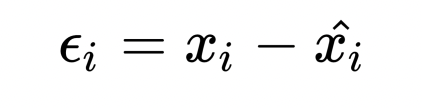

For any sample i, we can get the difference between the prediction and the actual value.
We could compute the mean error by just summing the errors, but since some errors are
negative and some are positive it is likely that they will cancel each other out. 

Then, the
question remains, how can we know how accurately our trained model performed on all
the datasets? This is where we use the concept of squared error. You should know that the
square of positive and negative numbers is always positive. Hence, they have no chance to
cancel each other out. So, we can represent the squared error with the following equation:

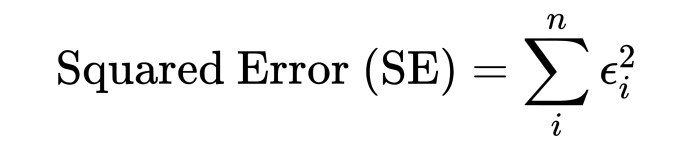

Once we know how to compute the squared error, we can compute the mean squared error.

So to compute the mean squared error, we can use the
following formula:
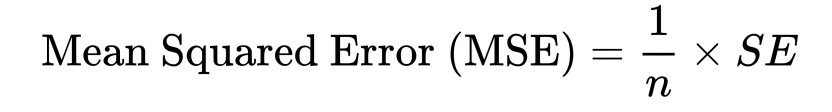

Now, if we take the root of the mean squared error, we get another accuracy measure called
the root mean squared error (RMSE). The equation now becomes this:

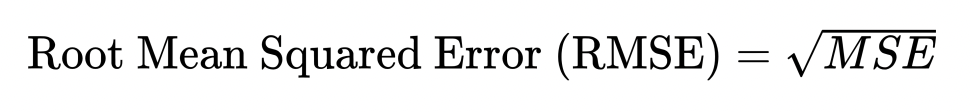

Another type of accuracy measure that is widely used is called the relative mean squared
error (rMSE). Don't get confused with RMSE. The formula for computing rMSE is as follows:
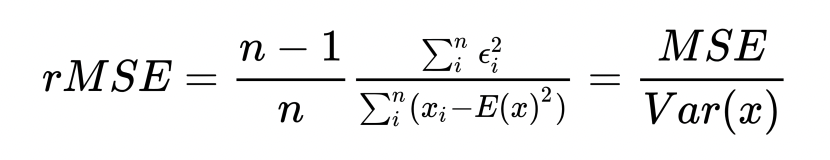

In the preceding equation, E(x) is referred to as the expected value of x. In addition to
rMSE, we have used the R2 method. The formula for computing R2 is as follows:


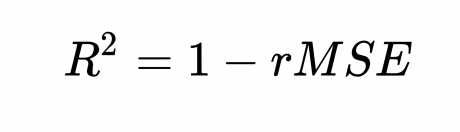

One more type of accuracy measure that is often seen in data science is the absolute error.
As the name suggests, it takes the absolute value and computes the sum. The formula for
measuring absolute error is as follows:

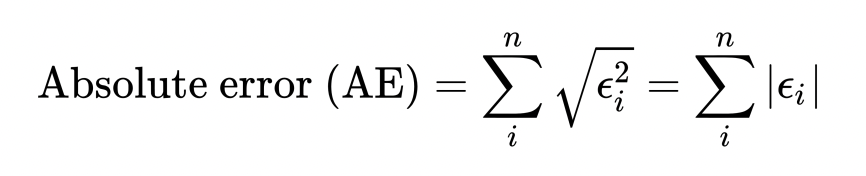

Finally, one more type of error that can be used in addition to absolute error is the mean
absolute error. The formula for computing mean absolute error is as follows:


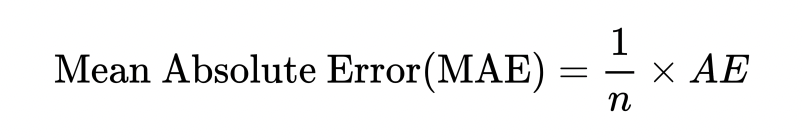

If you check the equations closely, you will see that
they are very closely related.

##Implementing a multiple linear regression model

When a dependent variable relies on several independent variables, the relationship can be
captured using multiple linear regression. 

Multiple linear regression can be viewed as an
extension of simple linear regression. When it comes to implementing multiple linear
regression using sklearn, there is not much difference between simple and multiple linear
regression

1. Include the extra columns in the X variable and run the code. Let's
include the additional columns for the X variable and follow the same code.
2. A two-dimensional linear regression model is a straight line; it is a
plane in three dimensions, and a hyperplane in over three dimensions

In [ ]:
# Preparing the data
X = df[['LSTAT','CRIM','NOX','TAX','PTRATIO','CHAS','DIS']]
y = df[['MEDV']]
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size
= 0.3, random_state = 10)
# Fitting the training data to our model
regressor.fit(X_train, y_train)
#score of this model
regressor.score(X_test, y_test)

0.644694253426537

In [ ]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,27.445779
1,31.1,31.364849
2,23.5,30.681874
3,26.6,22.143726
4,19.6,23.063037
5,14.3,16.421246
6,50.0,36.733894
7,14.3,15.887917
8,20.7,25.718492
9,37.6,32.816198


In [ ]:
#Let's make another multiple linear regression model with fewer features:

# Preparing the data
X = df[['LSTAT','CRIM','NOX','TAX','PTRATIO']]
y = df[['MEDV']]
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size
= 0.3, random_state = 10)
# Fitting the training data to our model
regressor.fit(X_train, y_train)
#score of this model
regressor.score(X_test, y_test)

0.5798770784084717

In [ ]:
# predict the y values
y_pred = regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,25.512908
1,31.1,31.496427
2,23.5,31.260496
3,26.6,26.553401
4,19.6,25.826407
5,14.3,17.589252
6,50.0,34.913399
7,14.3,15.165121
8,20.7,21.605243
9,37.6,31.078599


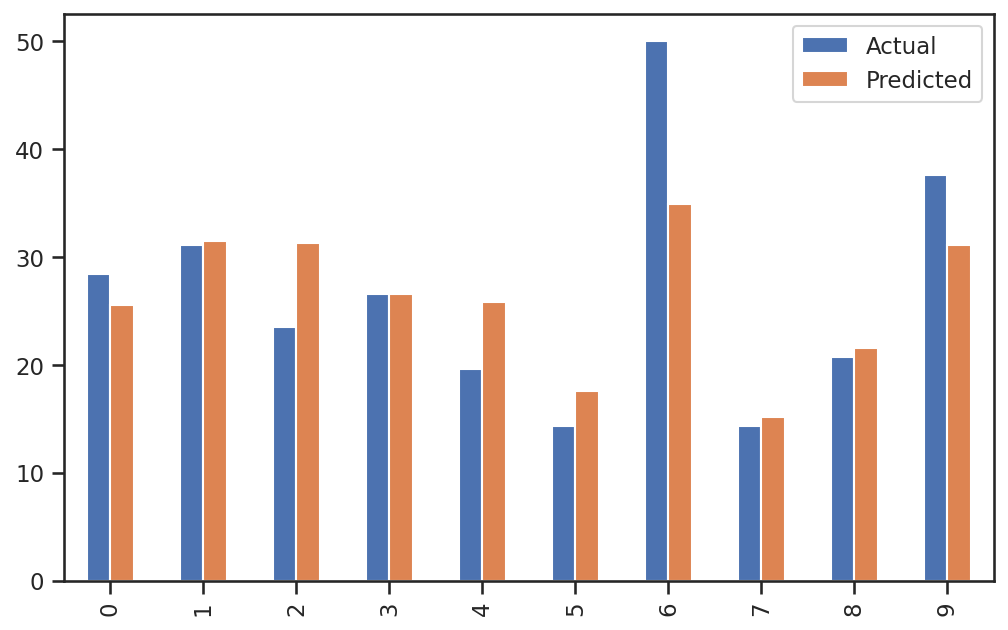

In [ ]:
evaluate.head(10).plot(kind = 'bar')


## Exercises

**Ex 1 :** Use the following dataset for this exercise : [Dataset](https://drive.google.com/file/d/1JPZyUL1jnzXAnVemK9pV3FyK6nAv-yuS/view?usp=sharing)

The above dataset describes the expenditure (in dollars) on recreation per month by employees at a certain company, and their corresponding monthly incomes.Using the equation for the linear regression that you calculated, estimate the monthly income of an employee at this company who spends : 

(a) 6000 dollars per month on recreation

(b) 1345 dollars per month on recreation

(c) 3860 dollars per month on recreation

Are these interpolations or extrapolations?


**Ex 2 :** This is the 
[Dataset](https://drive.google.com/file/d/1ARjGuLU1-Fk9c_k5ZIXeyhg6fuXbxoXM/view?usp=sharing) for this exercise.

We are interested in whether or not the number of letters in a state name depends upon the year the state entered the Union.

(a) Decide which variable should be the independent variable and which should be the dependent variable.

(b) Draw a scatter plot of the data.

(c) Does it appear from inspection that there is a relationship between the variables? Why or why not?

**Ex 3 :** In the above Dataset:

(a) Calculate the least-squares line. Put the equation in the form of:  y=a+bx.

(b) Find the correlation coefficient. What does it imply about the significance of the relationship?

(c) Find the estimated number of letters (to the nearest integer) a state would have if it entered the Union in 1900. 

(d) Find the estimated number of letters a state would have if it entered the Union in 1940.

**Ex 4 :** Use this [Dataset](https://drive.google.com/file/d/1WCLy8yv5J_HSAuLjOwG95GPCJ10wtJqx/view?usp=sharing) for this exercise:

A personnel officer in a governmental agency administered three newly developed aptitude tests to a random sample of 24 applicants for entry-level positions in the agency. For the purpose of the study, all 24 applicants were accepted for positions irrespective of their test scores. After a probationary period, each applicant was rated for proficiency on the job.

The scores on the three tests (x1, x2, x3) and the job proficiency score (y) for the 24 employees are in the Dataset.

(a) Create a scatterplot matrix and the correlation matrix for all of the variables in the data set.

(b) Find out the proficiency score of a student with scores (91,129,9). 

(c) The model's predicted value for part (b) should be 83. Find out the model's RMSE and rMSE for this. Are these same?


**Ex 5 :** Ecologists have long known that there is a relationship between the amount of precipitation a
location receives and the number of trees that grow in the area. Suppose that the yearly rainfall (x, measured in mm)
and the amount of the ground covered by trees (y, measured on a scale from 0 to 100) are recorded for 49 geographic
locations. In the sample data, x has a sample mean of 1182.4 and a sample standard deviation of 226.0, while y has a
sample mean of 49.6 and a sample standard deviation of 7.1. The sample correlation between x and y is 0.673.


Q1. In a simple linear regression analysis of this data, when we write 

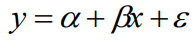

which of the following do we assume?

a) The x values are independent and normally distributed with mean 0 and constant variance.

b) The x values are independent and normally distributed with variance 0 and constant mean.

c) The errors are independent and normally distributed with mean 0 and constant variance.

d) The errors are independent and normally distributed with variance 0 and constant mean.

e) both a) and c)


Q2. Use the information provided to calculate the regression equation.

a) TreeCover = 24.70 + 0.0211 Rainfall

b) TreeCover = 0.0211 + 24.70 Rainfall

c) TreeCover = –25371.8 + 21.5 Rainfall

d) TreeCover = 21.5 – 25371.8 Rainfall

e) TreeCover = 25471.0 + 21.5 Rainfall

Q3. For this data set, find the degrees of freedom for regression.

a) 1 

b) 2 

c) 47 

d) 48 

e) 49

Q4. In a regression t test for this data, which of the following statements is the alternative hypothesis (in words)?

a) The population mean of tree cover is not zero.

b) The population mean of tree cover is zero.

c) Tree cover depends on rainfall.

d) Tree cover does not depend on rainfall.

e) The population means of tree cover and rainfall are not equal.

Q5. Suppose now that we record a 50th observation, include it in the data set, and recalculate the regression equation. Which of the following possibilities for the 50th observation would probably change the regression equation the most?

a) x = 900, y = 45

b) x = 1200, y = 40

c) x = 1200, y = 60

d) x = 2400, y = 75

e) x = 2400, y = 25